In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import pandas as pd

In [2]:
df=yf.download('BTC-USD',start='2018-01-01',end='2022-10-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2022-09-26,18803.900391,19274.873047,18721.285156,19222.671875,19222.671875,44148798321
2022-09-27,19221.839844,20338.455078,18915.667969,19110.546875,19110.546875,58571439619
2022-09-28,19104.621094,19688.343750,18553.296875,19426.720703,19426.720703,53071298734


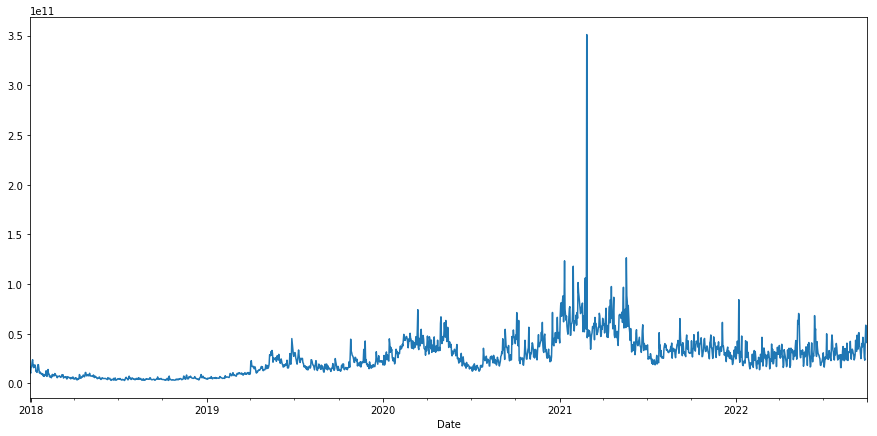

In [3]:
df.Volume.plot(figsize=(15,7))

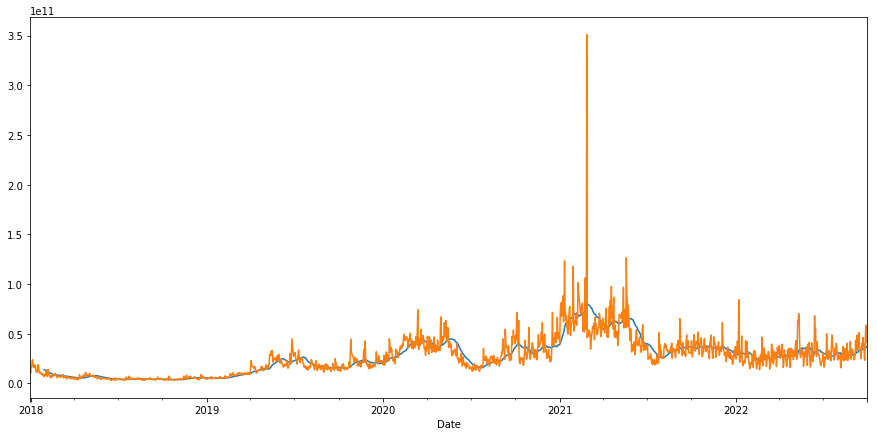

In [4]:
df.Volume.rolling(window=30).mean().plot(figsize=(15,7))
df.Volume.plot(figsize=(15,7))

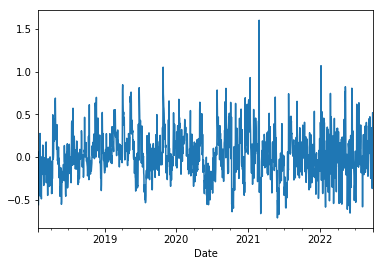

In [5]:
#Normalized the Data
vol_norm=np.log(df['Volume']/df['Volume'].rolling(30).median()).dropna()
vol_norm.plot()

In [6]:
vol_norm

Date
2018-01-29   -0.560072
2018-01-30   -0.362207
2018-01-31   -0.433788
2018-02-01   -0.180849
2018-02-02    0.064352
                ...   
2022-09-26    0.246935
2022-09-27    0.518711
2022-09-28    0.393287
2022-09-29    0.114715
2022-09-30    0.176702
Name: Volume, Length: 1706, dtype: float64

In [7]:
Mon=[]
Tues=[]
Wed=[]
Thur=[]
Fri=[]
Sat=[]
Sun=[]

def get_dsr(day,dsr):
    if day=='Monday':
        Mon.append(float(dsr))
    elif day =='Tuesday':
        Tues.append(float(dsr))
    elif day =='Wednesday':
        Wed.append(float(dsr))
    elif day =='Thursday':
        Thur.append(float(dsr))
    elif day =='Friday':
        Fri.append(float(dsr))
    elif day =='Saturday':
        Sat.append(float(dsr))
    elif day =='Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wronf with the input for the day')

In [8]:
for i in range(0,len(vol_norm)):
    df_date=str(vol_norm.index[i])
    df_dsr=vol_norm[i]
    df_month=df_date.split('-')[1]
    curr_date=df.index[i]
    df_weekday=calendar.day_name[curr_date.weekday()]
    
    get_dsr(df_weekday,df_dsr)

In [9]:
days=pd.DataFrame(columns=['Mean'],index=['Monday','Tuesday','wednesday','Thursday','Friday','Satureday','Sunday'])
days.loc['Monday','Mean']=np.mean(Mon)
days.loc['Tuesday','Mean']=np.mean(Tues)
days.loc['wednesday','Mean']=np.mean(Wed)
days.loc['Thursday','Mean']=np.mean(Thur)
days.loc['Friday','Mean']=np.mean(Fri)
days.loc['Satureday','Mean']=np.mean(Sat)
days.loc['Sunday','Mean']=np.mean(Sun)
days

,Mean
Monday,0.06028
Tuesday,0.077311
wednesday,0.073574
Thursday,0.066162
Friday,-0.097143
Satureday,-0.099312
Sunday,0.060128


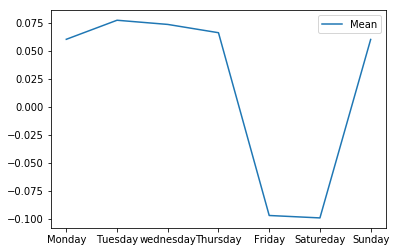

In [10]:
days.plot()

In [17]:
df=yf.download('BTC-USD',start='2018-01-01',end='2019-10-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2019-09-26,8487.669922,8515.685547,7895.629395,8118.967773,8118.967773,19258205289
2019-09-27,8113.101074,8271.520508,7965.922852,8251.845703,8251.845703,16408941156
2019-09-28,8251.273438,8285.617188,8125.431641,8245.915039,8245.915039,14141152736


In [18]:
#Normalized the Data
vol_norm=np.log(df['Volume']/df['Volume'].rolling(30).median()).dropna()

In [19]:
Mon=[]
Tues=[]
Wed=[]
Thur=[]
Fri=[]
Sat=[]
Sun=[]

def get_dsr(day,dsr):
    if day=='Monday':
        Mon.append(float(dsr))
    elif day =='Tuesday':
        Tues.append(float(dsr))
    elif day =='Wednesday':
        Wed.append(float(dsr))
    elif day =='Thursday':
        Thur.append(float(dsr))
    elif day =='Friday':
        Fri.append(float(dsr))
    elif day =='Saturday':
        Sat.append(float(dsr))
    elif day =='Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wronf with the input for the day')

In [20]:
for i in range(0,len(vol_norm)):
    df_date=str(vol_norm.index[i])
    df_dsr=vol_norm[i]
    df_month=df_date.split('-')[1]
    curr_date=df.index[i]
    df_weekday=calendar.day_name[curr_date.weekday()]
    
    get_dsr(df_weekday,df_dsr)

In [21]:
days.loc['Monday','2018-2019']=np.mean(Mon)
days.loc['Tuesday','2018-2019']=np.mean(Tues)
days.loc['wednesday','2018-2019']=np.mean(Wed)
days.loc['Thursday','2018-2019']=np.mean(Thur)
days.loc['Friday','2018-2019']=np.mean(Fri)
days.loc['Satureday','2018-2019']=np.mean(Sat)
days.loc['Sunday','2018-2019']=np.mean(Sun)
days

,Mean,2019-2020,2018-2019
Monday,0.06028,0.082509,0.054842
Tuesday,0.077311,0.097340,0.072557
wednesday,0.073574,0.117622,0.071409
Thursday,0.066162,0.084280,0.046075
Friday,-0.097143,-0.019853,-0.065390
Satureday,-0.099312,-0.012327,-0.067660
Sunday,0.060128,0.091455,0.025432


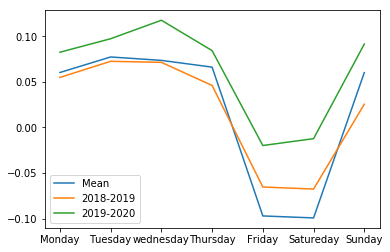

In [22]:
days[['Mean','2018-2019','2019-2020']].plot()

In [23]:
#We can see year by year it maintain same pattern